# Escalamiento y estandarización variables

**¿Por qué debería escalar y/o estandarizar?**

Muchos algoritmos de ML tienen mejor desempeño cuando los atributos (variables o caracteristicas) están en escalas similares o cuando se aproximan a una distribución normal. En este _notebook_ vamos a ver de manera gráfica cómo cambian nuestros datos al aplicar ciertas transformaciones.

## Escalar los datos

Escalar generalmente significa cambiar el rango de los valores, pero la forma de la distribución no cambia. Piensa en cómo un modelo a escala de un edificio tiene las mismas proporciones que el original, solo que es más pequeño. Por eso decimos que está dibujado **a escala**. En este contexto, en general queremos mover las dimensiones para que nuestros valores queden entre 0 y 1.

Por ejemplo, si se considera un conjunto de datos que contiene dos características, edad (x1) e ingresos (x2), donde: 

- La edad varía de 0 a 100.
- Los ingresos varían de 0 a 1.000.000 y más. 

Aquí los ingresos son unas 1.000 veces mayores que la edad, y claramente, estas dos características están en rangos muy diferentes. Cuando estamos haciendo un predictor, estas diferencias puedes producir comportamientos anómalos, así que escalamos los datos para traer todas las variables al mismo rango.

## Estandarización

La estandarización de las características alrededor del 0 con una desviación estándar de 1 es importante cuando comparamos medidas que tienen diferentes unidades. Las variables que se miden a diferentes escalas no contribuyen por igual al análisis y podrían terminar creando un sesgo.

Un ejemplo muy clásico es el de los grados Celcius vs los grados Kelvin. Una diferencia de un grado en ambas escalas representa lo mismo, sin embargo, el 0 Kelvin es muy distinto al 0 Celcius. Por lo mismo, si tenemos una colección de datos con temperaturas, al estandarizar da igual si representamos los datos en Celcius o Kelvin, ya que con este procedimiento logramos que el 0 signifique lo mismo en ambas representaciones.

Ahora vamoos a ver unos ejemplos gráficos, para esto vamos a importar librerías.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Ahora vamos a generar **6 arreglos de 1000 números** en escalas distintas para poder mostrar el efecto escalar y estandarizar los datos. Ojo que nuestros datos van a seguir distintas distribuciones.

In [5]:
# Generaremos algunos valores de distribuciones específicas
beta = np.random.beta(4,1,1000)*50
expo = np.random.exponential(10,1000)
bimodal = np.concatenate([np.random.normal(20,2.5,500),np.random.normal(-20,2.5,500)])
normalPlaticurtica = np.random.normal(10,3,1000)
normalLeptocurtica = np.random.normal(10,12,1000)
normalMesocurtica = np.random.normal(0,1,1000)

In [6]:
# Ahora generaremos un DataFrame con las distintas distribuciones
dataset = pd.DataFrame(
    {
     'Beta': beta, 'Exponencial': expo, 'Bimodal': bimodal, 
     'NormalP': normalPlaticurtica, 'NormalL': normalLeptocurtica, 
     'Normal': normalMesocurtica
    })

In [7]:
dataset

,Beta,Exponencial,Bimodal,NormalP,NormalL,Normal
0,49.731260,7.281425,21.149387,14.594066,2.212841,1.341095
1,49.264317,2.732585,24.788948,10.001650,3.834416,0.776154
2,41.493094,4.945009,18.142138,9.759479,12.634592,0.251748
3,22.442025,4.481982,18.463950,10.987272,29.075147,-0.818264
4,43.548544,2.663832,18.826518,4.046011,9.317502,-0.252884
...,...,...,...,...,...,...
995,36.052404,0.222292,-21.844956,6.426946,15.567726,-0.783018
996,31.298528,8.654475,-20.429286,9.487712,31.987754,1.390836
997,38.618674,6.155222,-20.722959,14.280663,23.206026,0.247068
998,41.763435,3.861577,-24.775717,6.737227,12.719434,-0.617381


## Graficando las distribuciones 

Primero vamos a graficar las distribuciones por separado a modo de recordatorio. Después las graficaremos todas juntas para entender el problema de trabajar con datos en distintas escalas.

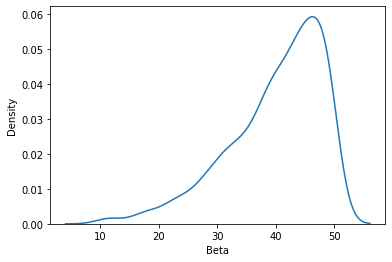

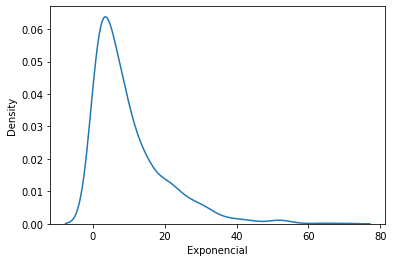

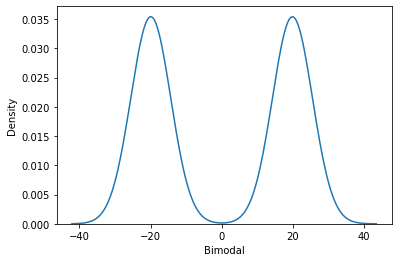

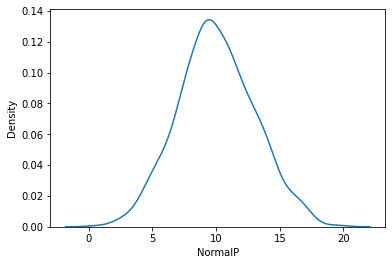

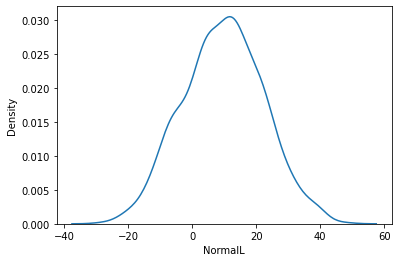

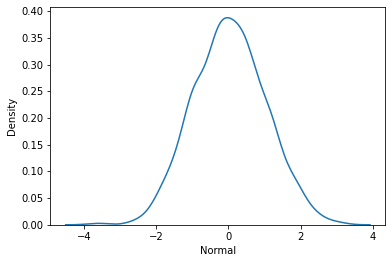

In [8]:
#grafiquemos las distribuciones
sns.kdeplot(dataset['Beta'])
plt.show()
sns.kdeplot(dataset['Exponencial'])
plt.show()
sns.kdeplot(dataset['Bimodal'])
plt.show()
sns.kdeplot(dataset['NormalP'])
plt.show()
sns.kdeplot(dataset['NormalL'])
plt.show()
sns.kdeplot(dataset['Normal'])
plt.show()

¿Podemos generar un único grafico con todas la variables que estamos analizando? La verdad es un poco complejo poder comparar algo con escalas tan distintas ¿cierto?.

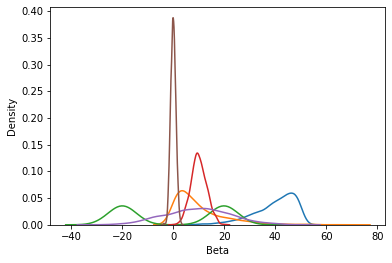

In [9]:
sns.kdeplot(dataset['Beta'])
sns.kdeplot(dataset['Exponencial'])
sns.kdeplot(dataset['Bimodal'])
sns.kdeplot(dataset['NormalP'])
sns.kdeplot(dataset['NormalL'])
sns.kdeplot(dataset['Normal'])
plt.show()

Revisemos las métricas de este DataFrame. Podemos revisar los valores mínimos y máximos, además, también podemos comparar las medias.

In [10]:
dataset.describe()

,Beta,Exponencial,Bimodal,NormalP,NormalL,Normal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.950725,10.045137,-0.020755,10.025608,9.707891,0.037099
std,8.088850,10.063105,20.087557,3.007189,12.548265,1.000459
min,10.196515,0.011839,-26.948153,0.456785,-28.079880,-3.750251
25%,35.450257,2.886892,-19.793052,8.017758,1.313547,-0.658845
50%,41.868244,6.939297,-0.017272,9.859607,10.244932,0.034956
75%,46.304953,14.051555,19.863334,12.064659,18.430305,0.701394
max,49.993848,69.507397,28.302767,19.817507,48.051433,3.170023


## Escalamiento MinMax

Ahora vamos a escalar nuestros datos para que sus valores queden entre 0 y 1.

- A la observacion le sustrae el mínimo y divide por el rango de máximo - mínimo
- La transformación conserva la forma de la distribución original 
- La importancia de datos atípicos se conserva
- La media varía

Recuerda imaginar en cómo un modelo a escala de un edificio tiene las mismas proporciones que el original, solo que es una versión más pequeña.

In [12]:
escalador = preprocessing.MinMaxScaler()

# Aplicamos el escalador
dsE = escalador.fit_transform(dataset)

# Creamos un nuevo DataFrame
dsFinal = pd.DataFrame(dsE, columns=dataset.columns)

Visitemos nuevamente las métricas.

In [13]:
dsFinal.describe()

,Beta,Exponencial,Bimodal,NormalP,NormalL,Normal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.747643,0.144373,0.487366,0.494239,0.496350,0.547283
std,0.203251,0.144802,0.363570,0.155324,0.164824,0.144569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634559,0.041370,0.129502,0.390532,0.386089,0.446717
50%,0.795825,0.099682,0.487429,0.485665,0.503404,0.546974
75%,0.907308,0.202023,0.847253,0.599558,0.610921,0.643276
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


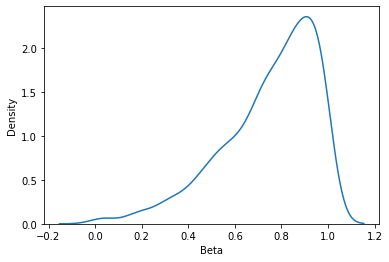

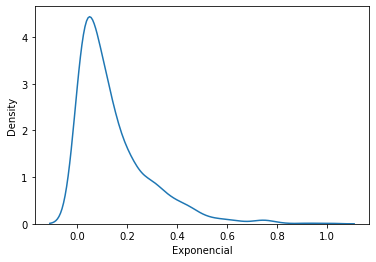

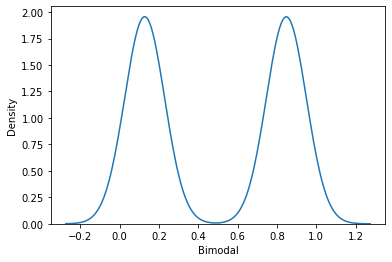

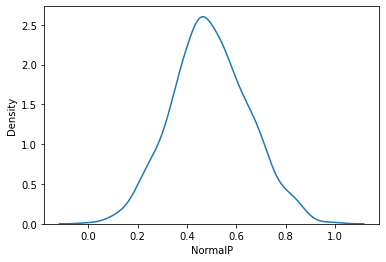

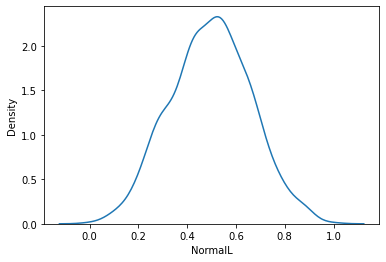

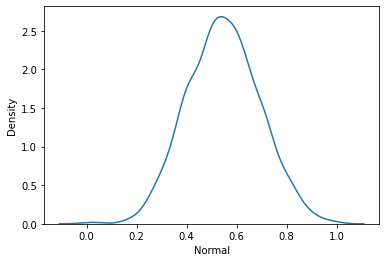

In [14]:
sns.kdeplot(dsFinal['Beta'])
plt.show()
sns.kdeplot(dsFinal['Exponencial'])
plt.show()
sns.kdeplot(dsFinal['Bimodal'])
plt.show()
sns.kdeplot(dsFinal['NormalP'])
plt.show()
sns.kdeplot(dsFinal['NormalL'])
plt.show()
sns.kdeplot(dsFinal['Normal'])
plt.show()

Ahora si graficamos todo junto, las distribuciones son mucho más comparables. Además si estos valores ingresan a un modelo predictivo tendrán significancias comparables.

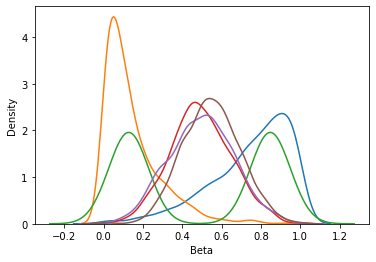

In [15]:
sns.kdeplot(dsFinal['Beta'])
sns.kdeplot(dsFinal['Exponencial'])
sns.kdeplot(dsFinal['Bimodal'])
sns.kdeplot(dsFinal['NormalP'])
sns.kdeplot(dsFinal['NormalL'])
sns.kdeplot(dsFinal['Normal'])
plt.show()

# RobustScaler

Esta es una téCon esta técnica, a cada observacion se le sustrae la media y se divide por el rango intercuartil (Q3 - Q1). Aquí no se escala a un rango predeterminado (ya no está necesariamente entre 0 y 1).

In [18]:
escalador = preprocessing.RobustScaler()
dsE = escalador.fit_transform(dataset)
dsFinal = pd.DataFrame(dsE, columns=dataset.columns)

In [19]:
dsFinal

,Beta,Exponencial,Bimodal,NormalP,NormalL,Normal
0,0.724388,0.030644,0.533752,1.169897,-0.469253,0.960227
1,0.681371,-0.376788,0.625529,0.035099,-0.374517,0.544902
2,-0.034561,-0.178625,0.457919,-0.024742,0.139609,0.159377
3,-1.789660,-0.220098,0.466034,0.278649,1.100104,-0.627258
4,0.154799,-0.382946,0.475177,-1.436555,-0.054183,-0.211611
...,...,...,...,...,...,...
995,-0.535790,-0.601631,-0.550420,-0.848220,0.310970,-0.601346
996,-0.973746,0.153626,-0.514722,-0.091896,1.270265,0.996795
997,-0.299370,-0.070228,-0.522127,1.092455,0.757217,0.155937
998,-0.009656,-0.275666,-0.624324,-0.771548,0.144566,-0.479575


In [20]:
dsFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,-0.176653,0.745194,-2.917790,-0.591264,0.000000e+00,0.408736,0.748580
Exponencial,1000.0,0.278185,0.901335,-0.620481,-0.362967,3.976311e-17,0.637033,5.604119
Bimodal,1000.0,-0.000088,0.506540,-0.679106,-0.498678,0.000000e+00,0.501322,0.714136
NormalP,1000.0,0.041019,0.743084,-2.323462,-0.455126,0.000000e+00,0.544874,2.460623
NormalL,1000.0,-0.031375,0.733098,-2.239023,-0.521792,5.188940e-17,0.478208,2.208742
Normal,1000.0,0.001575,0.735502,-2.782752,-0.510058,0.000000e+00,0.489942,2.304791


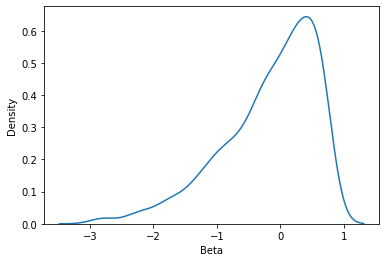

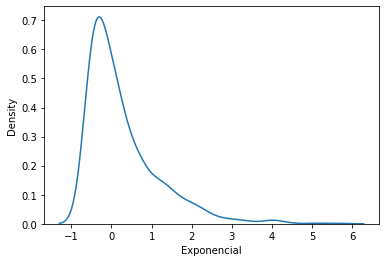

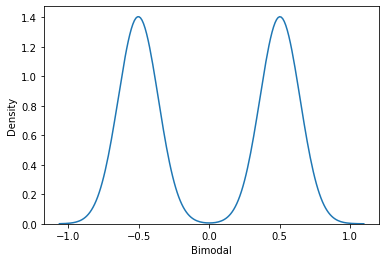

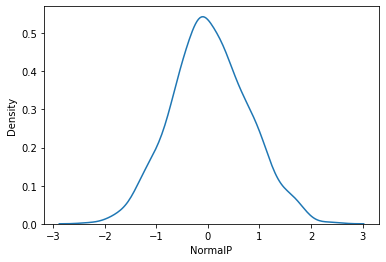

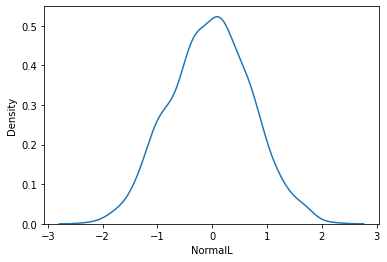

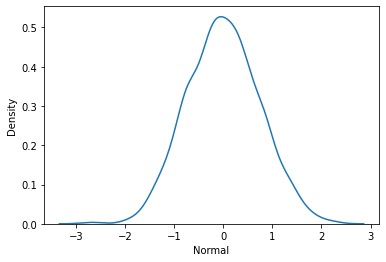

In [21]:
sns.kdeplot(dsFinal['Beta'])
plt.show()
sns.kdeplot(dsFinal['Exponencial'])
plt.show()
sns.kdeplot(dsFinal['Bimodal'])
plt.show()
sns.kdeplot(dsFinal['NormalP'])
plt.show()
sns.kdeplot(dsFinal['NormalL'])
plt.show()
sns.kdeplot(dsFinal['Normal'])
plt.show()

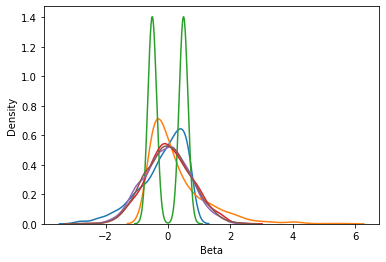

In [22]:
sns.kdeplot(dsFinal['Beta'])
sns.kdeplot(dsFinal['Exponencial'])
sns.kdeplot(dsFinal['Bimodal'])
sns.kdeplot(dsFinal['NormalP'])
sns.kdeplot(dsFinal['NormalL'])
sns.kdeplot(dsFinal['Normal'])
plt.show()

# StandardScaler

Esta es una técnica de estandarización en que:

- A la observación le sustrae la media y lo divide por la desviación estandar.
- El resultado es que nuestros datos tendrán media 0 y desviación estándar 1.
- El 0 va a representar el "centro" de nuestros datos.
- Es una técnica muy utilizada en predictores que se basan en el cálculo de distancia.

In [25]:
escalador = preprocessing.StandardScaler()
dsE = escalador.fit_transform(dataset)
dsFinal = pd.DataFrame(dsE, columns=dataset.columns)

In [26]:
dsFinal.describe()

,Beta,Exponencial,Bimodal,NormalP,NormalL,Normal
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.085621e-16,3.907985e-17,0.000000,4.867218e-16,1.030287e-16,1.953993e-17
std,1.000500e+00,1.000500e+00,1.000500,1.000500e+00,1.000500e+00,1.000500e+00
min,-3.680264e+00,-9.975369e-01,-1.341172,-3.183574e+00,-3.012901e+00,-3.787508e+00
25%,-5.566577e-01,-7.116916e-01,-0.984798,-6.680172e-01,-6.692992e-01,-6.959726e-01
50%,2.371756e-01,-3.087908e-01,0.000173,-5.522880e-02,4.281944e-02,-2.142386e-03
75%,7.859470e-01,3.983286e-01,0.990366,6.783982e-01,6.954570e-01,6.643230e-01
max,1.242222e+00,5.911895e+00,1.410709,3.257793e+00,3.057214e+00,3.133055e+00


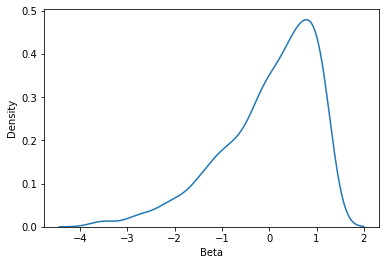

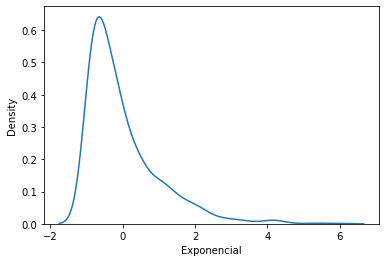

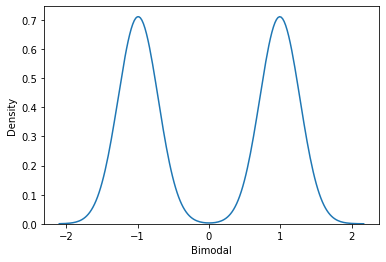

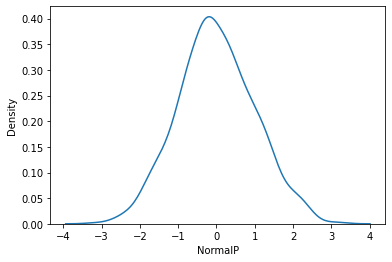

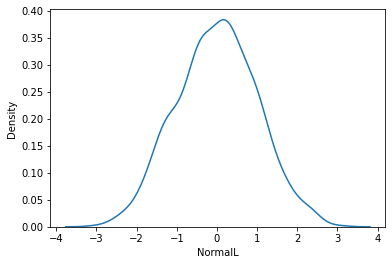

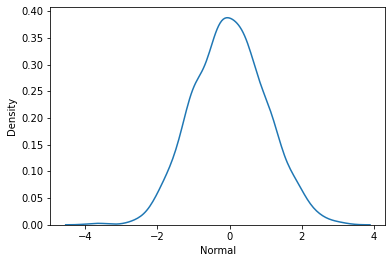

In [27]:
sns.kdeplot(dsFinal['Beta'])
plt.show()
sns.kdeplot(dsFinal['Exponencial'])
plt.show()
sns.kdeplot(dsFinal['Bimodal'])
plt.show()
sns.kdeplot(dsFinal['NormalP'])
plt.show()
sns.kdeplot(dsFinal['NormalL'])
plt.show()
sns.kdeplot(dsFinal['Normal'])
plt.show()

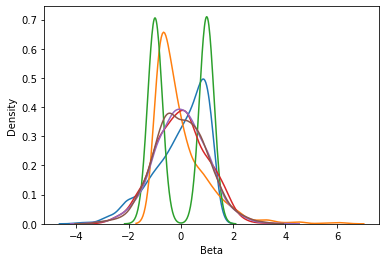

In [29]:
sns.kdeplot(dsFinal['Beta'])
sns.kdeplot(dsFinal['Exponencial'])
sns.kdeplot(dsFinal['Bimodal'])
sns.kdeplot(dsFinal['NormalP'])
sns.kdeplot(dsFinal['NormalL'])
sns.kdeplot(dsFinal['Normal'])
plt.show()

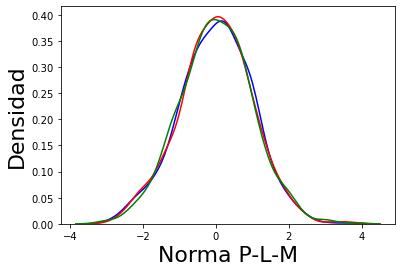

In [31]:
sns.kdeplot(dsFinal['NormalP'], color='b')
sns.kdeplot(dsFinal['NormalL'], color='r')
sns.kdeplot(dsFinal['Normal'], color='g')
plt.xlabel("Norma P-L-M", fontsize=22)
plt.ylabel("Densidad", fontsize=22)
plt.show()

#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'